In [13]:
from pathlib import Path

directory = Path('../data/test_images')

directory

WindowsPath('../data/test_images')

In [14]:
extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp']
images = []
for ext in extensions:
        images.extend(directory.glob(f"*{ext}"))
        images.extend(directory.glob(f"*{ext.upper()}"))

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

In [29]:
img = cv2.imread(str(images[0]))

In [36]:
type(img)

numpy.ndarray

In [33]:
img.shape

(4640, 3472, 3)

In [38]:
def resize_image(image: np.ndarray, target_size: Tuple[int, int], 
                 maintain_aspect: bool = True) -> np.ndarray:
    """Resize image to target size"""
    try:
        if not maintain_aspect:
            return cv2.resize(image, target_size)
        
        # Maintain aspect ratio
        h, w = image.shape[:2]
        target_w, target_h = target_size
        
        # Calculate scaling factor
        scale = min(target_w / w, target_h / h)
        new_w, new_h = int(w * scale), int(h * scale)
        
        # Resize and pad if necessary
        resized = cv2.resize(image, (new_w, new_h))
        
        if new_w != target_w or new_h != target_h:
            # Create padded image
            padded = np.zeros((target_h, target_w, 3), dtype=np.uint8)
            y_offset = (target_h - new_h) // 2
            x_offset = (target_w - new_w) // 2
            padded[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized
            return padded
        
        return resized
    
    except Exception as e:
        raise

In [71]:
def enhance_image(image: np.ndarray, brightness: float = 2, 
                 contrast: float = 2.0) -> np.ndarray:
    """Enhance image brightness and contrast"""
    try:
        enhanced = cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)
        return enhanced
    except Exception as e:
        raise

In [72]:
img_3 = enhance_image(img)

In [73]:
img_2 = resize_image(img, (500,500), False)

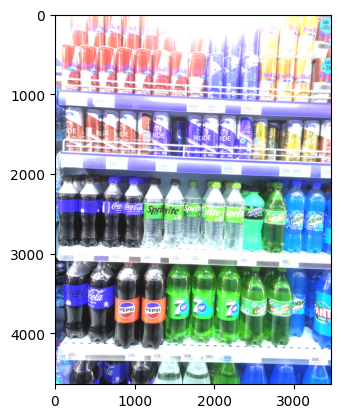

In [74]:
plt.imshow(img_3)

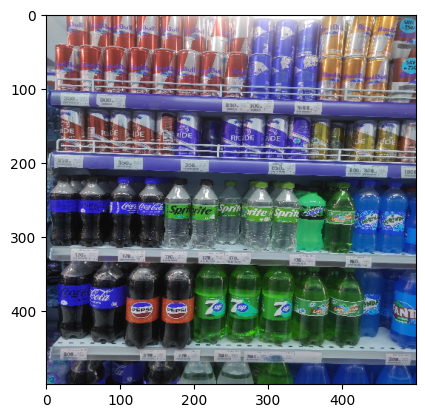

In [43]:
plt.imshow(img_2)

In [30]:
np.mean(img)

np.float64(103.86255116879204)

In [27]:
np.std(cv2.imread(str(images[0])))

np.float64(61.83807339033804)

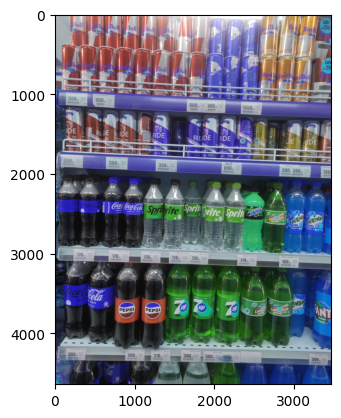

In [31]:
plt.imshow(img)

In [17]:
isinstance(directory, (str, Path))

True

In [18]:
directory.exists()

True

In [19]:
str(directory)

'..\\data\\test_images'